In [4]:
import numpy as np
import torch
import Maglib
import MagNet
import linear_std
import os
from path_config import *

model_saved_name = os.path.join(material_name, "model_colab.ckpt")
dataset_path = os.path.join(material_name, savePathstd)

# Import data

In [5]:
magData = Maglib.MagLoader(dataset_path + r"\valid.mat", data_source='mat')


std_loss_path = os.path.join(dataset_path, "std_loss.stdd")
std_temp_path = os.path.join(dataset_path, "std_temp.stdd")
std_freq_path = os.path.join(dataset_path, "std_freq.stdd")
std_b_path    = os.path.join(dataset_path, "std_b.stdd")

std_loss = linear_std.linear_std()
std_loss.load(std_loss_path)

std_temp = linear_std.linear_std()
std_temp.load(std_temp_path)

std_freq = linear_std.linear_std()
std_freq.load(std_freq_path)

std_b = linear_std.linear_std()
std_b.load(std_b_path)


data_b = std_b.unstd(magData.b)
data_temp = std_temp.unstd(magData.temp)
data_freq = std_freq.unstd(magData.freq)
data_loss = std_loss.unstd(magData.loss)



# Calculate predict loss and relative error

Device using  cpu


c:\Users\1\Desktop\PHD\Maglearn\MagLearn_1\Pipeline\MagNet.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_saved_name, map_locati

Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device using  cpu
Device usi

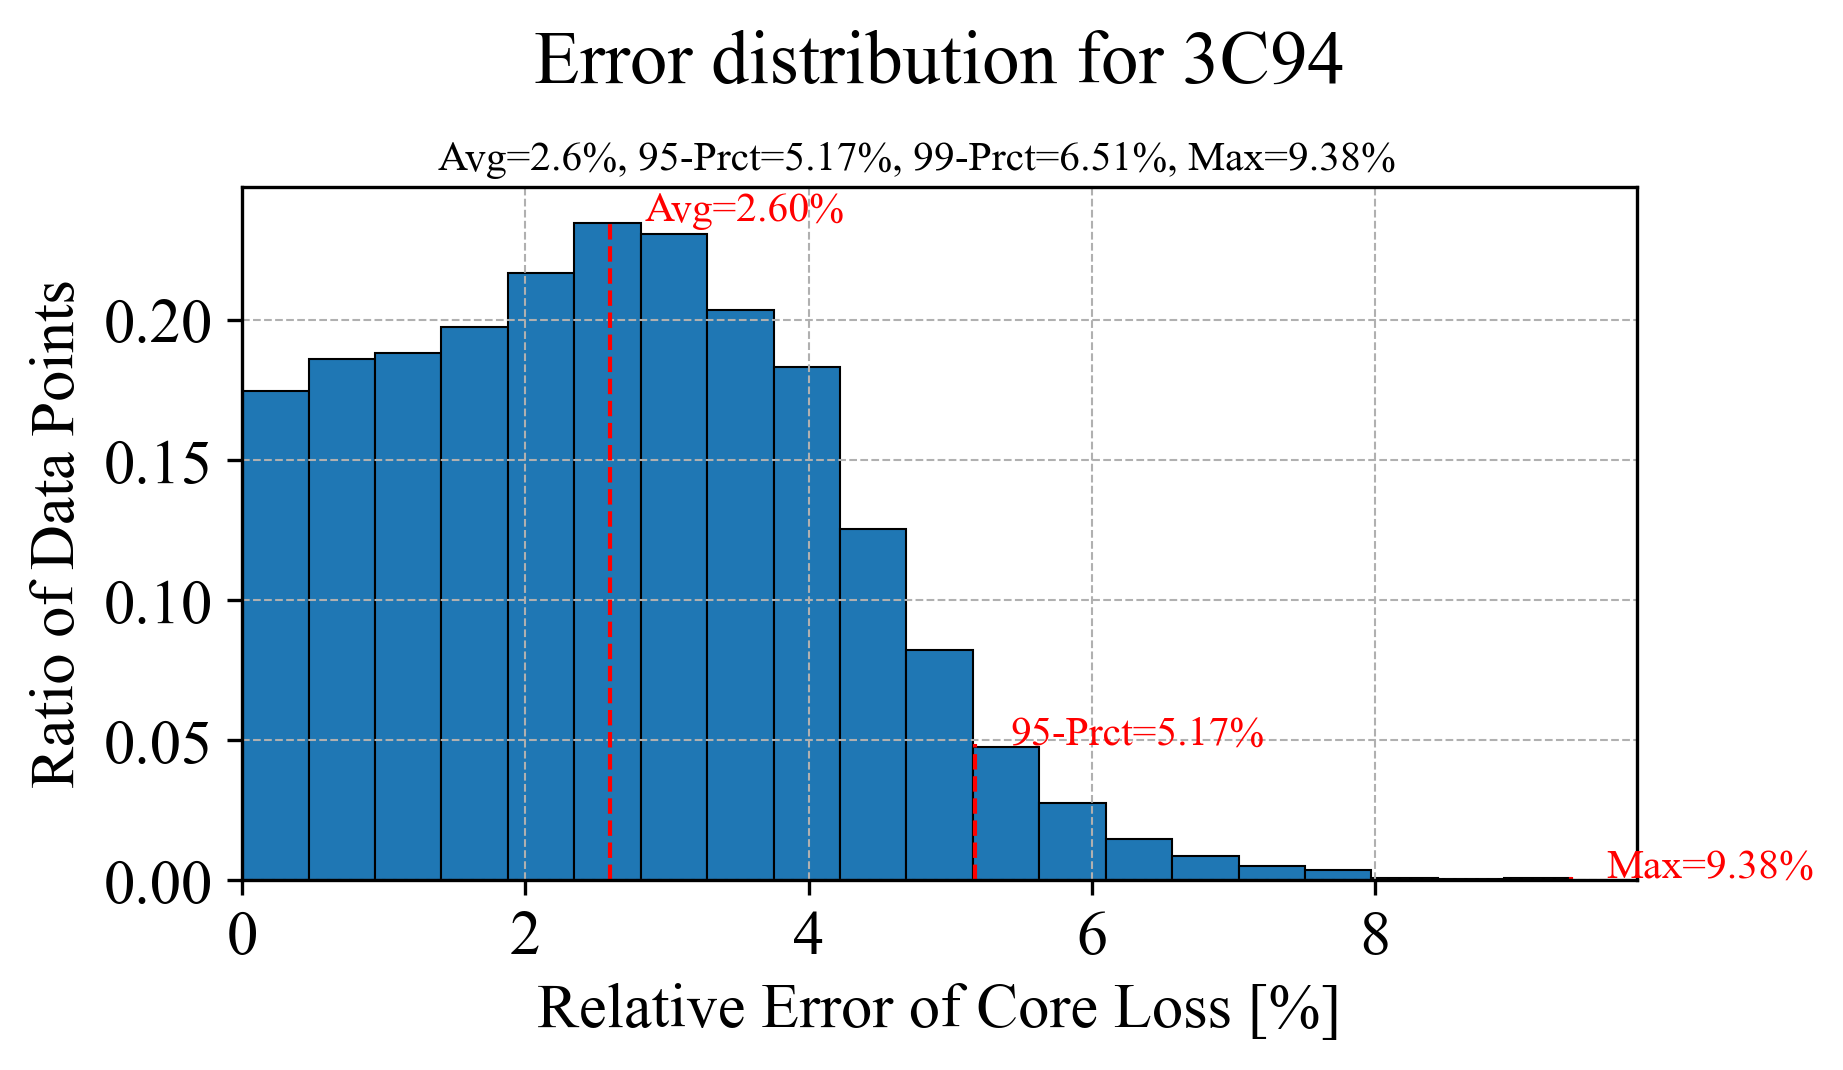

In [6]:
pred_loss=MagNet.MagLoss_percise(
    data_b,
    data_temp,
    data_freq,
    model_saved_name,
    dataset_path
    )

# For debugging purposes, you can save the predicted and true loss values to CSV files.
# file_path = os.path.join(material_name, f"{material_name}_pred_loss.csv")
# np.savetxt(file_path, pred_loss, delimiter='\n')
# file_path_2 = os.path.join(material_name, f"{material_name}_true_loss.csv")
# np.savetxt(file_path_2, data_loss, delimiter='\n')

# print("pred loss shape:", pred_loss.shape)
# print("True loss shape:", data_loss.shape)

# pred_loss = pred_loss.flatten()
# true_loss = true_loss.flatten()

relative_loss = np.abs(pred_loss - data_loss) / np.abs(data_loss)

plt_perc95=np.percentile(relative_loss,95)
plt_perc99=np.percentile(relative_loss,99)
plt_avg=np.mean(relative_loss)
plt_max=np.max(relative_loss)

max_index = np.argmax(relative_loss)
max_error = relative_loss[max_index]

print("Max relative error (%):", np.max(relative_loss)*100)
print("95th percentile of relative error (%):", np.percentile(relative_loss, 95)*100)
print("Mean of relative error (%):", np.mean(relative_loss)*100)

print("Maximum error occurs at index:", max_index)
print("Maximum error value:", max_error)

# save the plot
save_path = os.path.join(material_name, savePathPlot)
if not os.path.exists(save_path):
    os.makedirs(save_path)

error_plot=MagNet.Mag_plot(
    material_name,
    relative_loss,
    save_path
    )

